In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# First: explore the data


Review the unstructured csv files and answer the following questions with code that supports your conclusions:

* Are there any data quality issues present?
* Are there any fields that are challenging to understand?

We recommend using SQL or python and data visualization to examine the data.

## Product table

In [ ]:
# Read the data and specify the type of 'BARCODE' is object
df_products = pd.read_csv('PRODUCTS_TAKEHOME.csv', dtype={'BARCODE': object})
df_products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,796494407820
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,023278011028
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,461817824225
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,035000466815
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,0806810850459


In [ ]:
# Get the null values

print(df_products.shape)

df_products.isnull().sum()

(845552, 7)


CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

In [ ]:
df_products.describe()


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
count,845441,844128,784986,67459,619078,619080,841527
unique,27,121,344,127,4354,8122,841525
top,Health & Wellness,Candy,Confection Candy,Lip Balms,PLACEHOLDER MANUFACTURER,REM BRAND,017000329260
freq,512695,121036,56965,9737,86902,20813,2


In [ ]:
# Get the unique values of 'BARCODE'
df_products['BARCODE'].nunique()

#  There are 841525 unique values of 'BARCODE' in the dataset.


841525

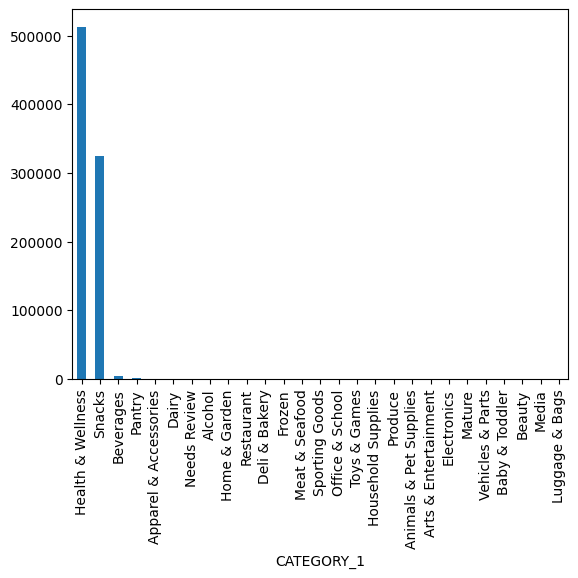

In [ ]:
#  Get the distribution of 'CATEGORY_1'
df_products['CATEGORY_1'].value_counts().plot(kind='bar')

plt.show()

# Health & Wellness and Snacks are the domonant categories

In [ ]:
# Get the duplicate values of non-null 'BARCODE'

df_products[df_products['BARCODE'].notnull()].duplicated('BARCODE').sum()
# df_products[df_products.duplicated('BARCODE')]

# Get the rows where 'BARCODE' is duplicated

df_products[df_products.duplicated('BARCODE', keep=False)].sort_values('BARCODE')


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
213340,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,SCHWARZKOPF,017000329260
304021,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,GÖT2B,017000329260
28421,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,SCHWARZKOPF,052336919068
709607,Health & Wellness,Hair Care,Hair Color,NaN,HENKEL,GÖT2B,052336919068
9,Health & Wellness,NaN,NaN,NaN,CHURCH & DWIGHT,REPHRESH,NaN
...,...,...,...,...,...,...,...
845070,Health & Wellness,Medicines & Treatments,NaN,NaN,RECKITT BENCKISER,CEPACOL,NaN
845187,Health & Wellness,Bath & Body,NaN,NaN,RECKITT BENCKISER,QUEEN V,NaN
845215,Snacks,NaN,NaN,NaN,PEPSICO,IMAGINE,NaN
845234,Health & Wellness,Oral Care,NaN,NaN,BOIRON,BOIRON,NaN



**Product Data Quality Summary:**

- **Barcode Integrity**: Notable issues with 4,025 products lacking barcodes out of 845,552 entries. This compromises inventory tracking and sales management, as barcodes are essential for product identification.
  
- **Barcode Duplicates**: Identified duplicates such as '017000329260' and '052336919068' assigned to different brands ('SCHWARZKOPF' and 'GÖT2B'). Each barcode must be unique to ensure accurate brand association.

- **Missing Data Highlights**:
  - **CATEGORY_1**: 111 missing entries, critical for basic product classification and analysis.
  - **CATEGORY_4**: A significant gap with 778,093 missing entries, indicating a severe lack of data in advanced product categorization.

**Action Required**:
Immediate correction of barcode duplications and addressing missing entries in CATEGORY_1 and CATEGORY_4 are priorities. Rectifying these issues will improve the reliability of our product database for operational and analytical purposes.


## Transaction table

In [ ]:
df_txn=pd.read_csv('TRANSACTION_TAKEHOME.csv', dtype={'BARCODE': object})

df_txn.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,015300014978,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,078742229751,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,783399746536,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,047900501183,1.00,


In [ ]:
# Check the datatypes
    # of the dataframe

df_txn.dtypes

RECEIPT_ID        object
PURCHASE_DATE     object
SCAN_DATE         object
STORE_NAME        object
USER_ID           object
BARCODE           object
FINAL_QUANTITY    object
FINAL_SALE        object
dtype: object

In [ ]:
# Convert the date to datetime format

df_txn['PURCHASE_DATE'] = pd.to_datetime(df_txn['PURCHASE_DATE'])
df_txn['SCAN_DATE'] = pd.to_datetime(df_txn['SCAN_DATE'])



In [ ]:
import pandas as pd
import numpy as np

# Preprocessing 'FINAL_SALE' column:
# Replace empty strings with NaN to handle missing values correctly.
df_txn['FINAL_SALE'] = df_txn['FINAL_SALE'].replace('', np.nan)

# Convert 'FINAL_SALE' to numeric, using 'coerce' to handle any conversion errors gracefully
# This will set any non-convertible values to NaN.
df_txn['FINAL_SALE'] = pd.to_numeric(df_txn['FINAL_SALE'], errors='coerce')

# Display the first few entries to verify the conversion
print("Preview of FINAL_SALE after conversion:")
print(df_txn['FINAL_SALE'].head())

# Preprocessing 'FINAL_QUANTITY' column:
# Replace the string 'zero' with NaN to handle these specific entries as missing values.
df_txn['FINAL_QUANTITY'] = df_txn['FINAL_QUANTITY'].replace('zero', np.nan)

# Convert 'FINAL_QUANTITY' to numeric, similarly using 'coerce' to handle errors.
df_txn['FINAL_QUANTITY'] = pd.to_numeric(df_txn['FINAL_QUANTITY'], errors='coerce')

# Display the first few entries to verify the conversion
print("Preview of FINAL_QUANTITY after conversion:")
print(df_txn['FINAL_QUANTITY'].head())


Preview of FINAL_SALE after conversion:
0     NaN
1    1.49
2     NaN
3    3.49
4     NaN
Name: FINAL_SALE, dtype: float64
Preview of FINAL_QUANTITY after conversion:
0    1.0
1    NaN
2    1.0
3    NaN
4    1.0
Name: FINAL_QUANTITY, dtype: float64


In [ ]:
df_txn.isnull().sum()

RECEIPT_ID            0
PURCHASE_DATE         0
SCAN_DATE             0
STORE_NAME            0
USER_ID               0
BARCODE            5762
FINAL_QUANTITY    12500
FINAL_SALE        12500
dtype: int64

In [ ]:
# Check the duplicates in the dataframe for receipt id and barcode

df_txn.duplicated(subset=['RECEIPT_ID']).sum()


25560

In [ ]:
df_txn.describe(include='all')

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
count,50000,50000,50000,50000,50000,44238,37500.000000,37500.000000
unique,24440,NaN,NaN,954,17694,11028,NaN,NaN
top,bedac253-2256-461b-96af-267748e6cecf,NaN,NaN,WALMART,64e62de5ca929250373e6cf5,078742223759,NaN,NaN
freq,12,NaN,NaN,21326,22,182,NaN,NaN
mean,NaN,2024-07-24 09:44:17.664000,2024-07-27 00:29:55.204816896+00:00,NaN,NaN,NaN,1.085902,4.576384
min,NaN,2024-06-12 00:00:00,2024-06-12 06:36:34.910000+00:00,NaN,NaN,NaN,0.010000,0.000000
25%,NaN,2024-07-03 00:00:00,2024-07-05 10:59:32.364750080+00:00,NaN,NaN,NaN,1.000000,1.790000
50%,NaN,2024-07-24 00:00:00,2024-07-26 11:43:59.964499968+00:00,NaN,NaN,NaN,1.000000,3.000000
75%,NaN,2024-08-15 00:00:00,2024-08-17 17:10:10.855000064+00:00,NaN,NaN,NaN,1.000000,5.190000
max,NaN,2024-09-08 00:00:00,2024-09-08 23:07:19.836000+00:00,NaN,NaN,NaN,276.000000,462.820000




**Transactions Data Quality Summary:**

- **Barcode Integrity**: Out of 50,000 transaction records, 5,762 transactions are missing barcodes. This lack of barcode data can lead to challenges in tracking and verifying product sales.

- **Column Clarification Needed**: The relationship between `FINAL_QUANTITY` and `FINAL_SALE` columns is unclear. It appears that these columns are mutually exclusive—if one column is populated, the other is null. This arrangement requires further investigation to understand how each is intended to be used in transaction recording.

**Action Required**:
* Clarification on the usage of `FINAL_QUANTITY` and `FINAL_SALE` is needed to ensure accurate financial and inventory reporting.

* Addressing the missing barcode information is crucial for improving transaction data integrity and operational analytics.

## User table

In [ ]:
df_user=pd.read_csv('USER_TAKEHOME.csv')

df_user.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [ ]:
df_user.shape

(100000, 6)

In [ ]:
# Check the null values

df_user.isnull().sum()

ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

In [ ]:
# Check the duplicate values
df_user.duplicated().sum()

0

In [ ]:
# Get the summary stats

df_user.describe(include='all')

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
count,100000,100000,96325,95188,69492,94108
unique,100000,99942,54721,52,2,11
top,5ef3b4f17053ab141787697d,2023-01-12 18:30:15.000 Z,1970-01-01 00:00:00.000 Z,TX,en,female
freq,1,2,1272,9028,63403,64240


<Axes: xlabel='GENDER'>

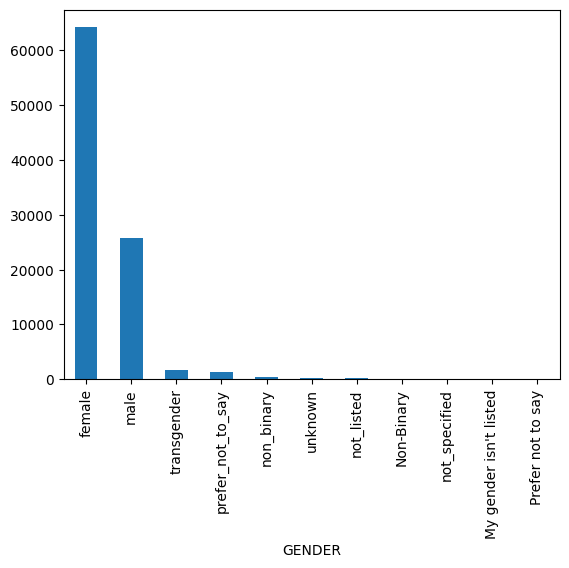

In [ ]:
#  Plot the gender distribution

df_user['GENDER'].value_counts().plot(kind='bar')

<Axes: xlabel='LANGUAGE'>

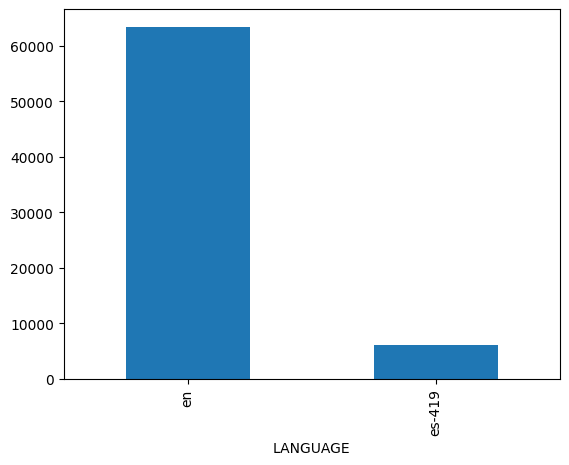

In [ ]:
# Get the languagae distribution

df_user['LANGUAGE'].value_counts().plot(kind='bar')
# df_user['LANGUAGE'].unique()



**User Data Quality Summary:**

- **Missing Data Concerns:**
   - **BIRTH_DATE**: Missing in 3,675 records, crucial for age-related analysis.
   - **STATE**: Missing in 4,812 records, important for regional targeting.
   - **LANGUAGE**: Absent in 30,508 records, critical for personalized communication.
   - **GENDER**: Missing in 5,892 records, affects demographic segmentation.

- **Data Integrity:**
   - Complete `ID` fields ensure unique identification, but missing demographic data compromises comprehensive user profiling.

**Recommendations:**

- **Improve Data Collection**: Strengthen data capture at user registration to minimize gaps in birth date, state, language, and gender.
   
- **Enhance Data Validation**: Introduce stricter validation rules during data entry to improve the accuracy of demographic information.



# Second: provide SQL queries

Answer three of the following questions with at least one question coming from the closed-ended and one from the open-ended question set. Each question should be answered using one query.

- **Closed-ended questions:**

What are the top 5 brands by receipts scanned among users 21 and over?

What are the top 5 brands by sales among users that have had their account for at least six months?

What is the percentage of sales in the Health & Wellness category by generation?

- **Open-ended questions:**

for these, make assumptions and clearly state them when answering the question.
Who are Fetch’s power users?

Which is the leading brand in the Dips & Salsa category?

At what percent has Fetch grown year over year?

In [ ]:
import sqlite3
#  Create a connection to the database
conn = sqlite3.connect('fetch_takehome_database.db')


In [ ]:
# Write DataFrames to SQLite Tables

df_products.to_sql('products', conn, if_exists='replace', index=False)
df_txn.to_sql('transactions', conn, if_exists='replace', index=False)
df_user.to_sql('users', conn, if_exists='replace', index=False)



100000

### 1. What are the top 5 brands by sales among users that have had their account for at least six months?

In [ ]:
# Output: Brand| Total Sales

# Process:
# Filter transactions from users whose accounts were created more than six months ago.
# Group by brand to sum the sales
# Sort the results based on the sales --keep the ties?

query ='''
    SELECT
        BRAND,
        SUM(FINAL_SALE) AS total_sales
    FROM users u
    JOIN transactions t
        ON u.ID=t.USER_ID
    JOIN products p
        ON t.BARCODE=p.BARCODE
    WHERE date('now', '-6 months') >= u.CREATED_DATE
        AND BRAND IS NOT NULL
    GROUP BY 1
    ORDER BY 2 DESC
    LIMIT 5;

'''

df_top5_brands = pd.read_sql(query, conn)

df_top5_brands

,BRAND,total_sales
0,CVS,72.00
1,TRIDENT,46.72
2,DOVE,42.88
3,COORS LIGHT,34.96
4,QUAKER,16.60


In [ ]:
#  If we want to keep the ties, we can use the below query with window function
query ='''
    WITH sales AS (
        SELECT
            BRAND,
            SUM(FINAL_SALE) AS total_sales,
            RANK() OVER (ORDER BY SUM(FINAL_SALE) DESC) AS brand_rank
        FROM users u
        JOIN transactions t
            ON u.ID=t.USER_ID
        JOIN products p
            ON t.BARCODE=p.BARCODE
        WHERE date('now', '-6 months') >= u.CREATED_DATE
            AND BRAND IS NOT NULL
        GROUP BY 1
    )
    SELECT
        BRAND,
        total_sales
    FROM sales
    WHERE brand_rank <= 5;

'''

df_top5_brands = pd.read_sql(query, conn)

df_top5_brands


,BRAND,total_sales
0,CVS,72.00
1,TRIDENT,46.72
2,DOVE,42.88
3,COORS LIGHT,34.96
4,QUAKER,16.60


<Axes: xlabel='BRAND'>

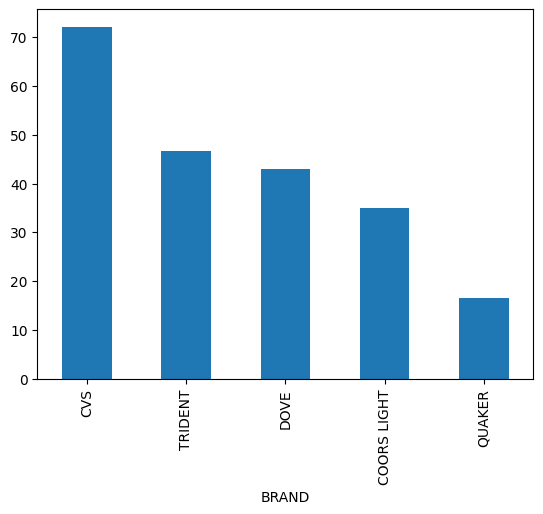

In [ ]:
# Plot the top 5 brands
df_top5_brands.plot(kind='bar', x='BRAND', y='total_sales', legend=False)

#### Findings:

Among users who have had their accounts for at least six months, the brands that lead in sales are notably diverse, indicating varied consumer preferences and spending behaviors within this group. The top-selling brands, ranked by total sales, are as follows:

1. **CVS** - $72.00: Dominates as the top brand, possibly reflecting a strong preference for health and wellness products among established users.

2. **TRIDENT** - $46.72: Suggests a significant inclination towards consumable goods, specifically in the snacks and confections category.

3. **DOVE** - $42.88: This ranking highlights the importance of personal care products, underscoring Dove's strong market position in this segment.

4. **COORS LIGHT** - $34.96: Indicates a steady demand for alcoholic beverages, particularly beer, within our long-term user base.

5. **QUAKER** - $16.60: Represents consumer goods, specifically in the healthy foods and breakfast cereals category.

These findings provide valuable insights into the product preferences of our more seasoned users and can guide targeted marketing strategies and inventory decisions to better cater to the needs of this loyal customer segment.

### 2. What is the percentage of sales in the Health & Wellness category by generation?

In [ ]:
#  Output: generation| pct_sales_in_health_wellness

# Process:
# Categorize Users by Generation: Using birth dates to classify users into generational segments.
# Calculate Health & Wellness Sales Percentage: For each generational category, compute the percentage of total sales that fall into the Health and Wellness category.


query ='''
WITH sales AS (
    SELECT
        FINAL_SALE,
        CATEGORY_1,
    CASE
        WHEN birth_date >= '1928-01-01' AND birth_date <= '1945-12-31' THEN 'Silent Generation'
        WHEN birth_date >= '1946-01-01' AND birth_date <= '1964-12-31' THEN 'Baby Boomers'
        WHEN birth_date >= '1965-01-01' AND birth_date <= '1980-12-31' THEN 'Generation X'
        WHEN birth_date >= '1981-01-01' AND birth_date <= '1996-12-31' THEN 'Millennials (Gen Y)'
        WHEN birth_date >= '1997-01-01' AND birth_date <= '2010-12-31' THEN 'Generation Z'
        WHEN birth_date >= '2011-01-01' AND birth_date <= '2024-12-31' THEN 'Generation Alpha'
        ELSE 'Other'
    END AS generation
    FROM users u
    JOIN transactions t
    ON u.ID=t.USER_ID
    JOIN products p
    ON t.BARCODE=p.BARCODE
    )

SELECT
    generation,
    ROUND((SUM(CASE WHEN CATEGORY_1='Health & Wellness' THEN FINAL_SALE ELSE 0 END)/SUM(FINAL_SALE))*100,2) AS pct_sales
from sales
GROUP BY 1
ORDER BY 2 DESC;



'''

health_sales_pct_by_generation = pd.read_sql(query, conn)

health_sales_pct_by_generation


,generation,pct_sales
0,Millennials (Gen Y),39.96
1,Baby Boomers,39.47
2,Generation X,29.87
3,Silent Generation,0.00
4,Generation Z,0.00


Text(0, 0.5, 'Percentage of Sales in Health & Wellness Category')

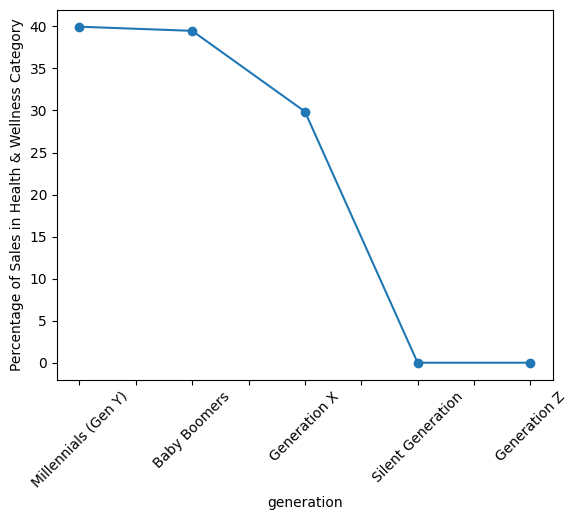

In [ ]:
# Plot the percentage of sales in Health & Wellness category by generation
health_sales_pct_by_generation.plot(kind='line', x='generation', y='pct_sales', legend=False, marker='o')
#  Change the labels to make it more readable
plt.xticks(rotation=45)
plt.ylabel('Percentage of Sales in Health & Wellness Category')





#### Findings:

- **Millennials (Gen Y)** and **Baby Boomers**: Lead in health and wellness purchases, each contributing around 40% to sales in this category. Their spending habits reflect a significant focus on maintaining and managing health, likely driven by Millennials' rising health awareness and Baby Boomers' needs to address age-related conditions.

- **Generation X**: Contributes 29.87% of the health and wellness sales, influenced by mid-life health needs and caregiving responsibilities for older parents.

- **Silent Generation and Generation Z**: Both show minimal engagement in the health and wellness category, with no significant sales recorded. This could be due to Gen Z's younger demographics and lesser health concerns, and the Silent Generation’s possible limited access or different health priorities.

#### Conclusion:
A clear generational gap in health and wellness spending highlights the market's concentration around Millennials and Baby Boomers. These groups should be primary targets for health-focused marketing initiatives, given their substantial contribution to sector sales.

### 3. Who are Fetch's power users?




#### Assumptions for Identifying 'Power Users':
'Power users' on Fetch are defined using a tailored RFM model and the 80/20 rule (Pareto Principle). This approach helps identify the most engaged and valuable customers by examining key aspects of their purchase behavior:

1. **Recency (Recency of Purchase)**:
   - **Last Order Date**: Indicates the most recent purchase, with more recent dates suggesting higher engagement and predicting ongoing activity.

2. **Frequency (Number of Transactions)**:
   - **Number of Orders**: Reflects the total transactions each user has made, with higher numbers indicating consistent engagement and loyalty.

3. **Monetary (Overall Spend)**:
   - **Total Spent**: The total monetary value each user has contributed to the platform, assessing their financial impact.
   - **Average Order Value**: Averages the spending per transaction, with higher values suggesting a preference for premium products.

The 80/20 rule focuses on the top 20% of customers who typically generate 80% of total revenue, allowing us to target our most profitable and active users efficiently.

In [ ]:
# Output: UserID| Generation| NumberOfOrders| AverageOrderValue| TotalSpent| LastOrderDate

# Purpose: Identify Power Users who fall into the top 20% based on total order value, number of orders, and recency of last order.
# Process:
# 1. Group by user and calculate total order value, number of orders, and the date of the last order.
# 2. Rank users using the NTILE() window function to segment them into quintiles.
# 3. Select users in the top quintile (top 20%) based on their overall engagement and spending.

query='''

WITH RANKED_USERS AS (
SELECT
    u.ID AS UserID,
    u.BIRTH_DATE,
    COUNT(t.receipt_id) AS NumberOfOrders,
    SUM(t.FINAL_SALE) / COUNT(t.receipt_id) AS AverageOrderValue,
    SUM(t.FINAL_SALE) AS TotalSpent,
    MAX(t.PURCHASE_DATE) AS LastOrderDate,
    NTILE(5) OVER (ORDER BY COUNT(t.receipt_id) DESC, MAX(t.PURCHASE_DATE) DESC) AS PercentileRank
FROM
    users u
JOIN
    transactions t ON u.ID = t.USER_ID
JOIN
    products p ON t.BARCODE = p.BARCODE
GROUP BY
    u.ID, u.BIRTH_DATE
ORDER BY
    TotalSpent DESC, NumberOfOrders DESC, LastOrderDate DESC
LIMIT 100
)

SELECT
    UserID,
    (CASE
        WHEN birth_date >= '1928-01-01' AND birth_date <= '1945-12-31' THEN 'Silent Generation'
        WHEN birth_date >= '1946-01-01' AND birth_date <= '1964-12-31' THEN 'Baby Boomers'
        WHEN birth_date >= '1965-01-01' AND birth_date <= '1980-12-31' THEN 'Generation X'
        WHEN birth_date >= '1981-01-01' AND birth_date <= '1996-12-31' THEN 'Millennials (Gen Y)'
        WHEN birth_date >= '1997-01-01' AND birth_date <= '2010-12-31' THEN 'Generation Z'
        WHEN birth_date >= '2011-01-01' AND birth_date <= '2024-12-31' THEN 'Generation Alpha'
        ELSE 'Other'
    END) AS Generation,
    NumberOfOrders,
    AverageOrderValue,
    TotalSpent,
    LastOrderDate
FROM RANKED_USERS
WHERE PercentileRank = 1;
    '''

power_users = pd.read_sql(query, conn)

power_users


,UserID,Generation,NumberOfOrders,AverageOrderValue,TotalSpent,LastOrderDate
0,62ffec490d9dbaff18c0a999,Baby Boomers,4,11.680000,46.72,2024-08-23 00:00:00
1,6661ed1e7c0469953bfc76c4,Millennials (Gen Y),4,4.650000,18.60,2024-07-23 00:00:00
2,5b441360be53340f289b0795,Millennials (Gen Y),4,4.580000,18.32,2024-07-22 00:00:00
3,6528a0a388a3a884364d94dc,Millennials (Gen Y),6,2.083333,12.50,2024-08-29 00:00:00
4,646bdaa67a342372c857b958,Millennials (Gen Y),4,2.987500,11.95,2024-08-19 00:00:00
5,63c8294d39c79dcbdd5c1e4f,Generation X,4,2.935000,11.74,2024-09-08 00:00:00
6,5c6c2998b06c0045a4fddc74,Silent Generation,4,2.730000,10.92,2024-08-17 00:00:00
7,65044dc5fe41d365c2ed7d71,Baby Boomers,4,2.417500,9.67,2024-08-08 00:00:00
8,610a8541ca1fab5b417b5d33,Generation X,4,2.267500,9.07,2024-08-18 00:00:00
9,62c09104baa38d1a1f6c260e,Generation X,4,2.080000,8.32,2024-08-05 00:00:00


In [ ]:
#  save the results to a csv file

power_users.to_csv('power_users.csv', index=False)

Deep dive analysis in power users

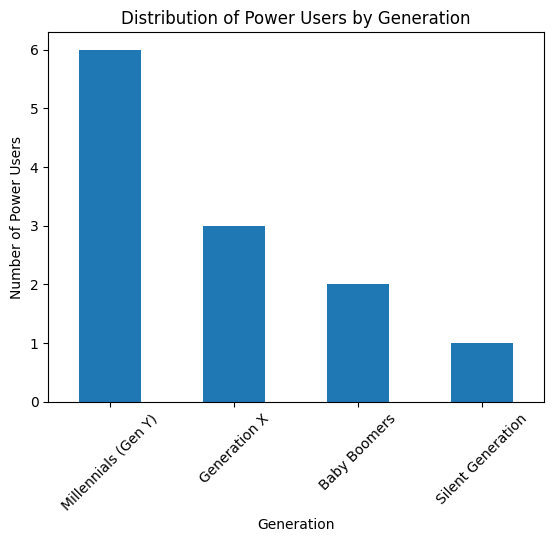

In [ ]:
# Show the distribution of power users by generation using a bar chart

power_users['Generation'].value_counts().plot(kind='bar',ylabel='Number of Power Users', xlabel='Generation', title='Distribution of Power Users by Generation')

plt.xticks(rotation=45)  # Optional: Rotate labels for better readability
plt.show()

#### Findings:

The analysis shows that the majority of power users belong to the Millennial generation (1981-1996), followed by Gen X (1965-1980) and Baby Boomers (1946-1964). There is also a smaller presence of the Silent Generation (before 1946). Interestingly, Gen Z (1997 and later) is absent from this dataset.

This suggests that the power users are primarily middle-aged adults rather than younger Gen Z users. If we’re looking to attract younger demographics, it might be worth investigating what barriers exist for their engagement.

# Third: communicate with stakeholders

Construct an email or slack message that is understandable to a product or business leader who is not familiar with your day-to-day work. Summarize the results of your investigation. Include:

Key data quality issues and outstanding questions about the data

One interesting trend in the data
    Use a finding from part 2 or come up with a new insight

Request for action: explain what additional help, info, etc. you need to make sense of the data and resolve any outstanding issues


### Message content

**Subject: Summary of Data Analysis and Key Insights**

Hi [Stakeholder's Name],

I hope this message finds you well. I've completed the data analysis and would like to share some key findings and data quality concerns:

1. **Data Quality Issues**
   - **Products Table:** Out of 845,552 product entries, 4,025 have missing barcodes. Additionally, we've identified duplicate barcodes for distinctly different brands (017000329260 for SCHWARZKOPF and 052336919068 for GÖT2B), suggesting issues with barcode uniqueness.
   - **Transactions Table:** There appears to be a mutual exclusivity between the `FINAL_QUANTITY` and `FINAL_SALE` columns—when one has a value, the other is null. This inconsistency needs clarification to understand the data's intent and improve reliability.

2. **Trend Analysis**
   - **Power Users Identification:** Using total order revenue, number of orders, and last purchase date, we focused on the top 20% of users. Our analysis indicates that Millennials (1981-1996), followed by Generation X (1965-1980) and Baby Boomers (1946-1964), are the primary power users, notably active in purchasing health and wellness products. Notably, CVS stands out as the leading brand among long-term users.

3. **Outstanding Issues and Actions Needed**
   - **Barcode Integrity:** To address missing and duplicate barcodes, I recommend a review of our product entry processes to ensure accuracy and uniqueness.
   - **Demographic Insights:** Additional demographic data collection for users could help refine our understanding of purchasing patterns and enhance targeted marketing strategies.

I believe addressing these issues will greatly improve our data integrity and analytical capabilities. Could we discuss these findings and the way forward? I look forward to your thoughts and any additional insights you might have.

Thank you for your attention to these matters.


Best,
Chen
